## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
batch_size = 256
epochs = 50

In [10]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
Patience = [10,25] #調整 earlystop 的等待次數至 10, 25 並比較結果

# 試改變 monitor "Validation Accuracy" 並比較結果
earlystop = EarlyStopping(monitor="val_accuracy", 
                          patience=Patience, 
                          verbose=1)

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in Patience:
    earlystop = EarlyStopping(monitor="val_loss", 
                          patience=i, 
                          verbose=1
                          )

    model= build_mlp(input_shape=x_train.shape[1:])
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[earlystop] )
    results[i] = {'train-loss': model.history.history["loss"], 'valid-loss': model.history.history["val_loss"], 'train-accuracy': model.history.history["accuracy"], 'valid-accuracy': model.history.history["val_accuracy"]}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.7040 - accuracy: 0.3986 - val_loss: 1.7948 - val_accuracy: 0.3755
Epoch 2/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.4795 - accuracy: 0.4762 - val_loss: 1.7461 - val_accuracy: 0.3909
Epoch 3/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.3924 - accuracy: 0.5045 - val_loss: 1.6875 - val_accuracy: 0.4027
Epoch 4/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.3253 - accuracy: 0.5287 - val_loss: 1.8612 - val_accuracy: 0.3775
Epoch 5/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.2637 - accuracy: 0.5523 - val_loss: 1.5530 - val_accuracy: 0.4494
Epoch 6/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.2137 - accuracy: 0.5685 - val_loss: 1.5459 - val_accuracy: 0.4532
Epoch 7/50
50000/50000 [==============================] 

50000/50000 [==============================] - 12s 246us/step - loss: 0.3725 - accuracy: 0.8667 - val_loss: 2.3977 - val_accuracy: 0.4723
Epoch 38/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.3577 - accuracy: 0.8715 - val_loss: 2.3684 - val_accuracy: 0.4668
Epoch 39/50
50000/50000 [==============================] - 12s 250us/step - loss: 0.3452 - accuracy: 0.8790 - val_loss: 2.5607 - val_accuracy: 0.4582
Epoch 00039: early stopping


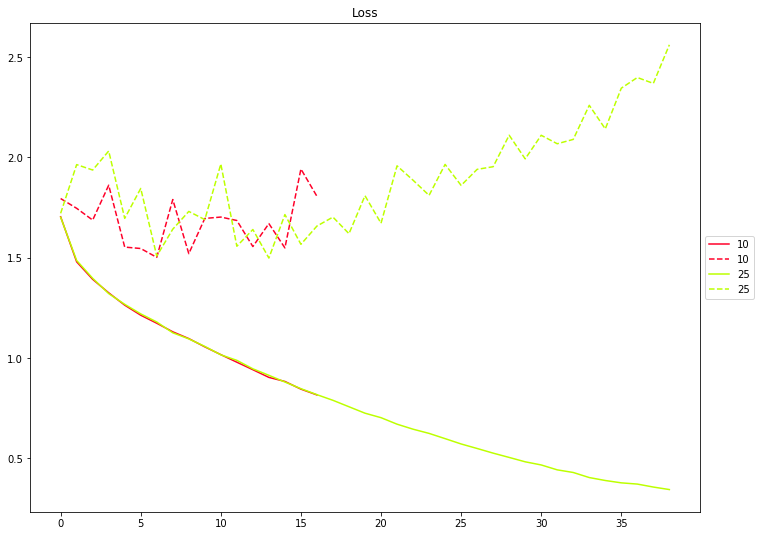

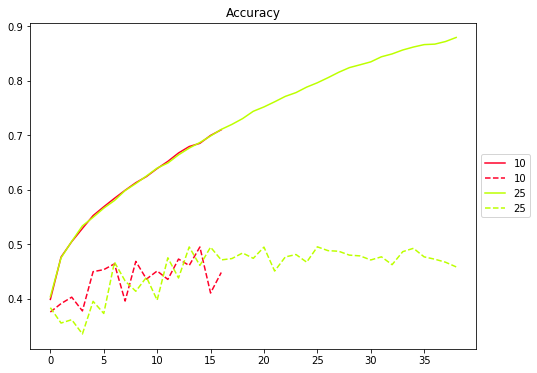

In [11]:

"""Code Here
將結果繪出
"""
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i*5])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i*5])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i*5])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i*5])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()